<a href="https://colab.research.google.com/github/madonnaojorin/MAT343_Linear_Algebra/blob/main/5-4_MathModel_LeastSquareAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#5.4. Mathematical Models and Least Squares Analysis


In [ ]:
install.packages("pracma")
library(pracma)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



We will study inconsistent systems of linear equations and learn how to find the “best possible solution” of such a system. The necessity of “solving” inconsistent systems arises in the computation of least squares regression lines.

####$\star$Example
Let's consider 2 sets of points in $\mathbb{R}^2$
$$S_1=\{(1,0),(2,1),(3,2)\}$$
and
$$S_2=\{(1,0),(2,1),(3,3)\}$$

As shown below, all points in $S_1$ lie on a single line $y=x-1$.

However, points in $S_2$ cannot lie on a single line. 

So, our question is **"How can we find the line $y=c_0+c_1x$ that “best fits” these points?"**

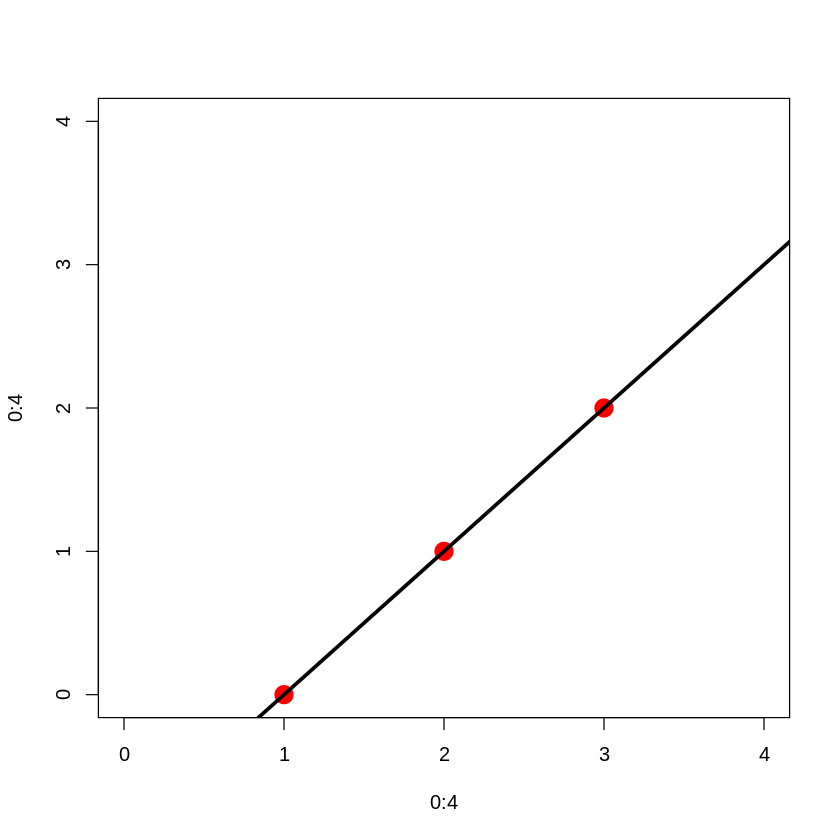

In [ ]:
# S1 
a = c(1,0)
b = c(2,1)
c = c(3,2)

plot(0:4, 0:4, type = "n") # setting up coord. system
points(a[1], a[2], col = "red", pch = 19, cex = 2)
points(b[1], b[2], col = "red", pch = 19, cex = 2)
points(c[1], c[2], col = "red", pch = 19, cex = 2)
abline(-1, 1, col = "black", lwd = 3)

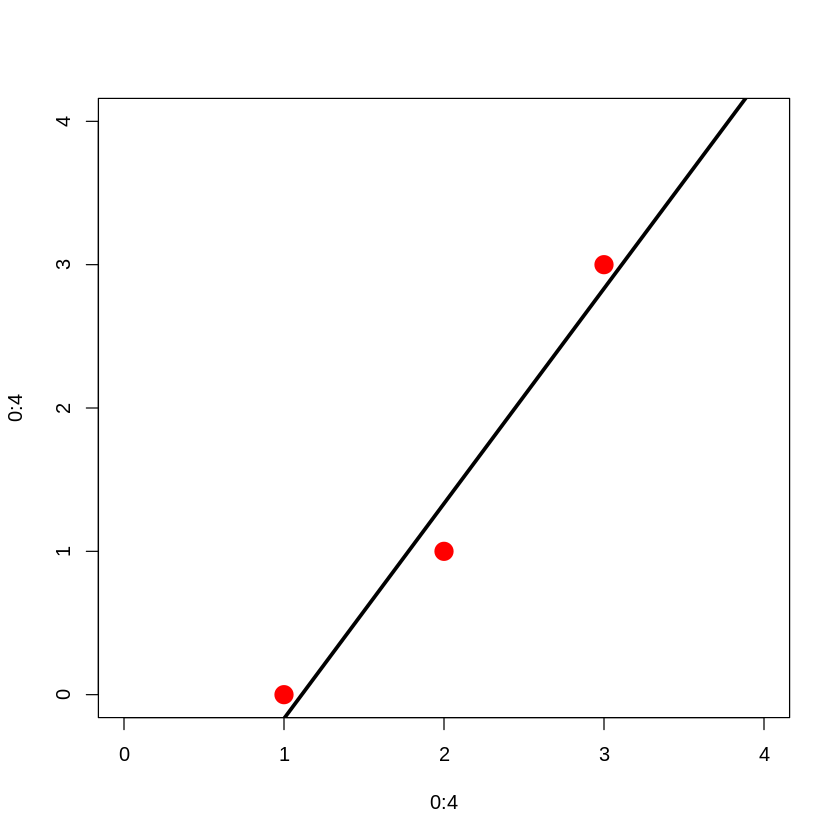

In [ ]:
#Let 
a = c(1,0)
b = c(2,1)
c = c(3,3)

# How can we find the line y=c_0+c_1x that “best fits” these points? 

plot(0:4, 0:4, type = "n") # setting up coord. system
points(a[1], a[2], col = "red", pch = 19, cex = 2)
points(b[1], b[2], col = "red", pch = 19, cex = 2)
points(c[1], c[2], col = "red", pch = 19, cex = 2)
abline(-5/3, 3/2, col = "black", lwd = 3)

One way is to note that if the three points were collinear, then the system of equations would be consistent.
\begin{align*}
c_0  {}+{} &c_1=0\\
c_0 {}+{} &2c_1=1\\
c_0 {}+{} &3c_1=3
\end{align*}
($\because c_0+c_1x=y$)

This system can be written in the matrix form $A\textbf{x}=\textbf{b}$, where
$$A=\begin{bmatrix}1&1\\1&2\\1&3\end{bmatrix},\:\:\: \textbf{b}=\begin{bmatrix}0\\1\\3\end{bmatrix},\:\:\: \textbf{x}=\begin{bmatrix}c_0\\c_1\end{bmatrix}$$



In [ ]:
S_2 <- matrix(c(1,1,0,1,2,1,1,3,3), 3, 3, byrow = TRUE)
S_2
rref(S_2)

1,1,0
1,2,1
1,3,3


1,0,0
0,1,0
0,0,1


The last row $\begin{bmatrix}0&0&|&1\end{bmatrix}$ indicates $0=1$, so the system is inconsistent. 

Although it is impossible to find $\textbf{x}$ such that $A\textbf{x}=\textbf{b}$, you can look for an $\textbf{x}$ that *minimizes* the norm of the error  $||A\textbf{x}-\textbf{b}||$. The solution $\textbf{x}=[c_0\:\:\:c_1]^T$ of this minimization problem results in **the least squares regression line** $y=c_0+c_1x$. 



Note: Check that the set $S_1$ has a solution because it is a consistent system and the line is $y=x-1$.

In [ ]:
S_1 <- matrix(c(1,1,0,1,2,1,1,3,2), 3, 3, byrow = TRUE)
rref(S_1)

1,0,-1
0,1,1
0,0,0


We will combine the ideas of orthogonality and projection to develop the concept of the least squares regression. To begin, consider the linear system $A\textbf{x}=\textbf{b}$, where $A$ is an $m\times n$ matrix and $\textbf{b}$ is a column vector in $\mathbb{R}^m$. You know how to use Gaussian elimination with back-substitution to solve for $\textbf{x}$ when the system is consistent. When the system is inconsistent, however, it is still useful to find the “best possible” solution; that is, the vector $\textbf{x}$ for which the difference between $A\textbf{x}$ and $\textbf{b}$ is smallest. One way to define “best possible” is to require that the norm of $A\textbf{x}-\textbf{b}$ be minimized. This definition is the heart of the least squares problem.

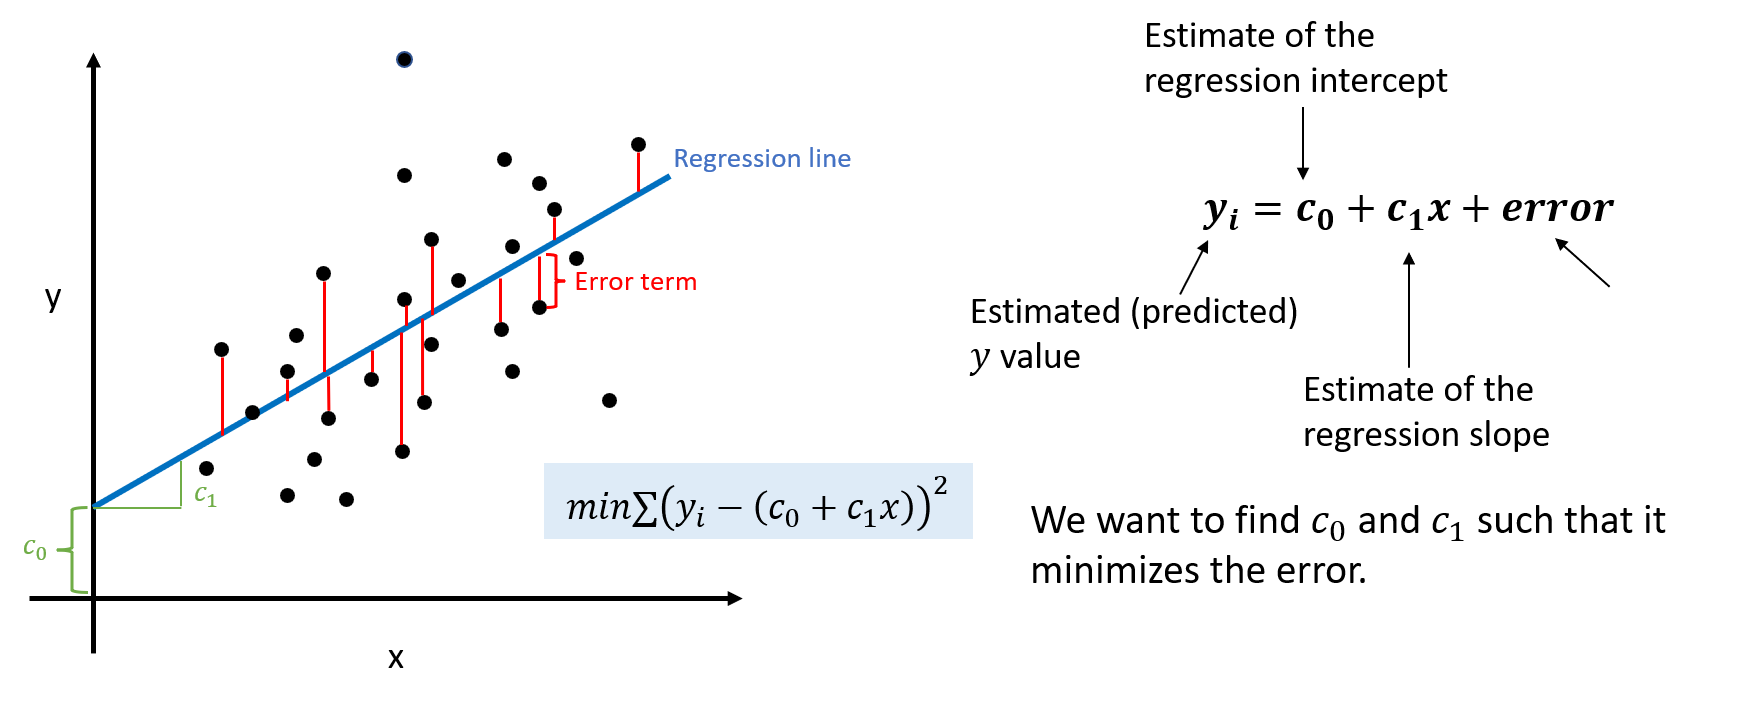

##Definition: Least Squares Problem
Given an $m\times n$ matrix $A$ and a vector $\textbf{b}$ in $\mathbb{R}^m$, the **least squares problem** is to find $\textbf{x}$ in $\mathbb{R}^n$ such that $||A\textbf{x}-\textbf{b}||^2$ is minimized.

(The term least squares comes from the fact that minimizing $||A\textbf{x}-\textbf{b}||$ is equivalent to minimizing $||A\textbf{x}-\textbf{b}||^2$, which is a sum of squares.)

##Definition: Orthogonal Subspaces
The subspaces $S_1$ and $S_2$ of $\mathbb{R}^n$ are **orthogonal** when $\textbf{v}_1\cdot\textbf{v}_2=0$ for all $\textbf{v}_1$ in $S_1$ and all $\textbf{v}_2$ in $S_2$.

####$\star$Example
The subspaces
$$S_1=\text{span}\left\{\begin{bmatrix}1\\0\\1\end{bmatrix},\begin{bmatrix}1\\1\\0\end{bmatrix}\right\}$$
and
$$S_2=\text{span}\left\{\begin{bmatrix}-1\\1\\1\end{bmatrix}\right\}$$
are orthogonal because the dot product of any vector in $S_1$ and any vector in $S_2$ is zero.

i.e.,
\begin{align*}
\langle1,0,1\rangle\cdot\langle-1,1,1\rangle=0\\
\langle1,1,0\rangle\cdot\langle-1,1,1\rangle=0\\
\end{align*}



##Definition: Orthogonal Complement
If $S$ is a subspace of $\mathbb{R}^n$, then the **orthogonal complement** of $S$ is the set
 $$S^{\perp}=\{\textbf{u}\in\mathbb{R}^n:\textbf{v}\cdot\textbf{u}=0 \hspace{2mm} \forall \hspace{2mm} \textbf{v}\in S\}.$$

The orthogonal complement of the trivial subspace $\{\textbf{0}\}$ is all of $\mathbb{R}^n$, and, conversely, the orthogonal complement of $\mathbb{R}^n$ is the trivial subspace $\{\textbf{0}\}$. 


####$\star$Example
Find the orthogonal complement of the subspace $S$ of $\mathbb{R}^4$ spanned by the two column vectors $\textbf{v}_1$ and $\textbf{v}_2$ of the matrix $A$.
$$A=\begin{bmatrix}1&0\\2&0\\1&0\\0&1\end{bmatrix}$$

**Solution**
A vector $\textbf{u}\in\mathbb{R}^4$ is in the orthogonal complement of $S$ when its dot product with each of the columns of $A$, $\textbf{v}_1$ and $\textbf{v}_2$, is zero. So, the orthogonal complement of $S$ consists of all the vectors $\textbf{u}$ such that $$A^T\textbf{u}=0.$$
$$\begin{bmatrix}1&2&1&0\\0&0&0&1\end{bmatrix}\begin{bmatrix}x_1\\x_2\\x_3\\x_4\end{bmatrix}=\begin{bmatrix}0\\0\end{bmatrix}$$

That is, the orthogonal complement of $S$ is the nullspace of the matrix $A^T$:
$$S^\perp=N(A^T)$$

Using the techniques for solving homogeneous linear systems, you can find that a basis for the orthogonal complement consists of the vectors
$$\textbf{u}_1=[-2\:\:\:1\:\:\:0\:\:\:0]^T$$
and
$$\textbf{u}_2=[-1\:\:\:0\:\:\:1\:\:\:0]^T$$


Notice that $\mathbb{R}^4$ is split into two subspaces, $S=\text{span}\{\textbf{v}_1,\textbf{v}_2\}$ and $S^\perp=\text{span}\{\textbf{u}_1,\textbf{u}_2\}$. In fact, the four vectors $\textbf{v}_1,\textbf{v}_2\textbf{u}_1,\textbf{u}_2$ form a basis for $\mathbb{R}^4$. Each vector in $\mathbb{R}^4$ can be uniquely written as a sum of a vector from $S$ and a vector from $S^\perp$. The next definition generalizes this concept.

##Definition: Direct Sum
Let $S_1$ and $S_2$ be two subspaces of $\mathbb{R}^n$. If each vector $\textbf{x}\in\mathbb{R}^n$ can be uniquely written as a sum of a vector $\textbf{s}_1$ from $S_1$ and a vector $\textbf{s}_2$ from $S_2$, $\textbf{x}=\textbf{s}_1+\textbf{s}_2$, then $\mathbb{R}^n$ is the **direct sum** of $S_1$ and $S_2$ and you can write $\mathbb{R}^n=S_1\bigoplus S_2$.


###Theorem 5.13: Properties of Orthogonal Subspaces
Let $S$ be a subspace of $\mathbb{R}^n$. Then the properties listed below are true.
* $\dim(S)+\dim(S^{\perp})=n$
* $\mathbb{R}^n=S\bigoplus S^\perp$
* $(S^\perp)^\perp=S$

###Theorem 5.14: Projection onto a Subspace
If $\{\textbf{u}_1,\textbf{u}_2,\ldots,\textbf{u}_t\}$ is an orthonormal basis for the subspace $S$ of $\mathbb{R}^n$, and $\textbf{v}\in\mathbb{R}^n$, then
$$\text{proj}_S\textbf{v}=(\textbf{v}\cdot\textbf{u}_1)\textbf{u}_1+(\textbf{v}\cdot\textbf{u}_2)\textbf{u}_2+\cdots+(\textbf{v}\cdot\textbf{u}_t)\textbf{u}_t.$$


####$\star$Example
Find the projection of the vector $\textbf{v}=\begin{bmatrix}1\\1\\3\end{bmatrix}$ onto the subspace $S$ of $\mathbb{R}^3$ spanned by the vectors
$$\textbf{w}_1=\begin{bmatrix}0\\3\\1\end{bmatrix}\:\:\:\text{ and }\:\:\:\textbf{w}_2=\begin{bmatrix}2\\0\\0\end{bmatrix}.$$

**Solution**
By normalizing $\textbf{w}_1$ and $\textbf{w}_2$ we obtain an orthonormal basis for $S$.
$$\{\textbf{u}_1,\textbf{u}_2\}=\left\{\frac{1}{\sqrt{10}}\textbf{w}_1,\frac{1}{2}\textbf{w}_2\right\}=\left\{\begin{bmatrix}0\\\frac{3}{\sqrt{10}}\\\frac{1}{\sqrt{10}}\end{bmatrix},\begin{bmatrix}1\\0\\0\end{bmatrix}\right\}$$
Use Theorem 5.14 to find the projection of $\textbf{v}$ onto $S$.
\begin{align*}
\text{proj}_S\textbf{v}&=(\textbf{v}\cdot\textbf{u}_1)\textbf{u}_1+(\textbf{v}\cdot\textbf{u}_2)\textbf{u}_2\\
&=\frac{6}{\sqrt{10}}\begin{bmatrix}0\\\frac{3}{\sqrt{10}}\\\frac{1}{\sqrt{10}}\end{bmatrix}+1\begin{bmatrix}1\\0\\0\end{bmatrix}\\
&=\begin{bmatrix}1\\\frac{9}{5}\\\frac{3}{5}\end{bmatrix}\end{align*}




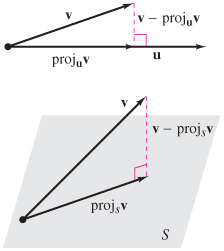

Among all the vectors in the subspace $S$, the vector $\text{proj}_S\textbf{v}$ is the closest vector to $\textbf{v}$.

###Theorem 5.15: Orthogonal Projection and Distance
Let $S$ be a subspace of $\mathbb{R}^n$ and let $\textbf{v}\in\mathbb{R}^n$. Then, for all $\textbf{u}\in S$, $\textbf{u}\neq \text{proj}_S\textbf{v}$ ,
$$||\textbf{v}-\text{proj}_S\textbf{v}||<||\textbf{v}-\textbf{u}||.$$

Recall that if $A$ is an $m\times n$ matrix, then the column space of $A$ is a subspace of $\mathbb{R}^m$ consisting of all vectors of the form $A\textbf{x}$, $\textbf{x}\in\mathbb{R}^n$. The four **fundamental subspaces** of the matrix  are:

1. $N(A)=$ nullspace of $A$
2. $N(A^T)=$ nullspace of $A^T$
3. $R(A)=$ column space of $A$
4. $R(A^T)=$ column space of $A^T$



####$\star$Example
Find the four fundamental subspaces of the matrix
$$A=\begin{bmatrix}1&2&0\\0&0&1\\0&0&0\\0&0&0\end{bmatrix}$$

**Solution**
The column space of $A$ is simply the span of the first and third columns (pivot column). 
$$R(A)=\text{span}\left\{\begin{bmatrix}1\\0\\0\\0\end{bmatrix},\begin{bmatrix}0\\1\\0\\0\end{bmatrix}\right\}$$

The column space of $A^T$ is equal to the row space of $A$, which is spanned by the first two rows. 
$$R(A^T)=\text{span}\left\{\begin{bmatrix}1\\2\\0\end{bmatrix},\begin{bmatrix}0\\0\\1\end{bmatrix}\right\}$$

The nullspace of $A$ is a solution space of the homogeneous system $A\textbf{x}=\textbf{b}$. 
$$N(A)=\text{span}\left\{\begin{bmatrix}-2\\1\\0\end{bmatrix}\right\}$$

The nullspace of $A^T$ is a solution space of the homogeneous system $A^T\textbf{x}=\textbf{b}$. 
$$N(A^T)=\text{span}\left\{\begin{bmatrix}0\\0\\1\\0\end{bmatrix},\begin{bmatrix}0\\0\\0\\1\end{bmatrix}\right\}$$

###Theorem 5.16: Fundamental Subspaces of a Matrix
If $A$ is an $m\times n$ matrix, then 
* $R(A)$ and $N(A^T)$ are orthogonal subspaces of $\mathbb{R}^m$.
* $R(A^T)$ and $N(A)$ are orthogonal subspaces of $\mathbb{R}^n$.
* $R(A)\bigoplus N(A^T)=\mathbb{R}^m$.
* $R(A^T)\bigoplus N(A)=\mathbb{R}^n$

We have now developed all the tools needed to solve the least squares problem. Recall that we are attempting to find a vector $\textbf{x}$ that minimizes $||A\textbf{x}-\textbf{b}||$, where $A$ is an $m\times n$ matrix and $\textbf{b}$  is a vector in $\mathbb{R}^m$.

Let $S$ be the column space of $A$ (i.e., $S=R(A)$). Assume that $\textbf{b}$ is not in $S$, because otherwise the system $A\textbf{x}=\textbf{b}$ would be consistent. We are looking for a vector $A\textbf{x}$ in $S$ that is as close as possible to $\textbf{b}$.

From Theorem 5.15, we know that the desired vector is the projection of $\textbf{b}$ onto $S$. So, $A\textbf{x}=\text{proj}_S\textbf{b}$ and $A\textbf{x}-\textbf{b}=\text{proj}_S\textbf{b}-\textbf{b}$ is orthogonal to $S=R(A)$. However, this implies that $A\textbf{x}=\textbf{b}$ is in $R(A)^\perp$, which equals $N(A^T)$. This is the crucial observation: $A\textbf{x}=\textbf{b}$ is in the nullspace of $A^T$. So, 
\begin{align*}
A^T(A\textbf{x}-\textbf{b})&=\textbf{0}\\
A^TA\textbf{x}-A^T\textbf{b}&=\textbf{0}\\
A^TA\textbf{x}&=A^T\textbf{b}
\end{align*}

The solution of the least squares problem comes down to solving the $n\times n$ linear system of equations $A^TA\textbf{x}=A^T\textbf{b}$.
 These equations are the **normal equations** of the least squares problem $A\textbf{x}=\textbf{b}$.

####$\star$Example

Find the solution of the least squares problem $A\textbf{x}=\textbf{b}$ that we saw at the beginning.

$$\begin{bmatrix}1&1\\1&2\\1&3\end{bmatrix}\begin{bmatrix}c_0\\c_1\end{bmatrix}=\begin{bmatrix}0\\1\\3\end{bmatrix}$$

**Solution**
\begin{align*}
A^TA=\begin{bmatrix}1&1&1\\1&2&3\end{bmatrix}\begin{bmatrix}1&1\\1&2\\1&3\end{bmatrix}=\begin{bmatrix}3&6\\6&14\end{bmatrix}\\
A^T\textbf{b}=\begin{bmatrix}1&1&1\\1&2&3\end{bmatrix}\begin{bmatrix}0\\1\\3\end{bmatrix}=\begin{bmatrix}4\\11\end{bmatrix}
\end{align*}

The normal equations are represented by the system

$$A^TA\textbf{x}=A^T\textbf{b}$$
$$\begin{bmatrix}3&6\\6&14\end{bmatrix}\textbf{x}=\begin{bmatrix}4\\11\end{bmatrix}.$$

The solution of this system of equations is
$$\textbf{x}=\begin{bmatrix}-\frac{5}{3}\\\frac{3}{2}\end{bmatrix}.$$

which implies that the least squares regression line for the data is $y=-\frac{5}{3}+\frac{3}{2}x$.




#Mathematical Modeling
Least squares problems play a fundamental role in mathematical modeling of real-life phenomena. The next example shows how to model the world population using a least squares quadratic polynomial.

The table shows the world population (in billions) for six different years. (Source: U.S. Census Bureau)

| Year           |1985	|1990 |1995 |2000	|2005	|2010 |
| ---------      |---  |---  |---  |---  |---- |---  |
|Population, $y$ |4.9  |5.3  |5.7  |6.1  |6.5  |6.9  |

Let $x=5$ represent the year 1985. Find the least squares regression quadratic polynomial $y=c_0+c_1x+c_2x^2$ for the data and use the model to estimate the population for the year 2020.


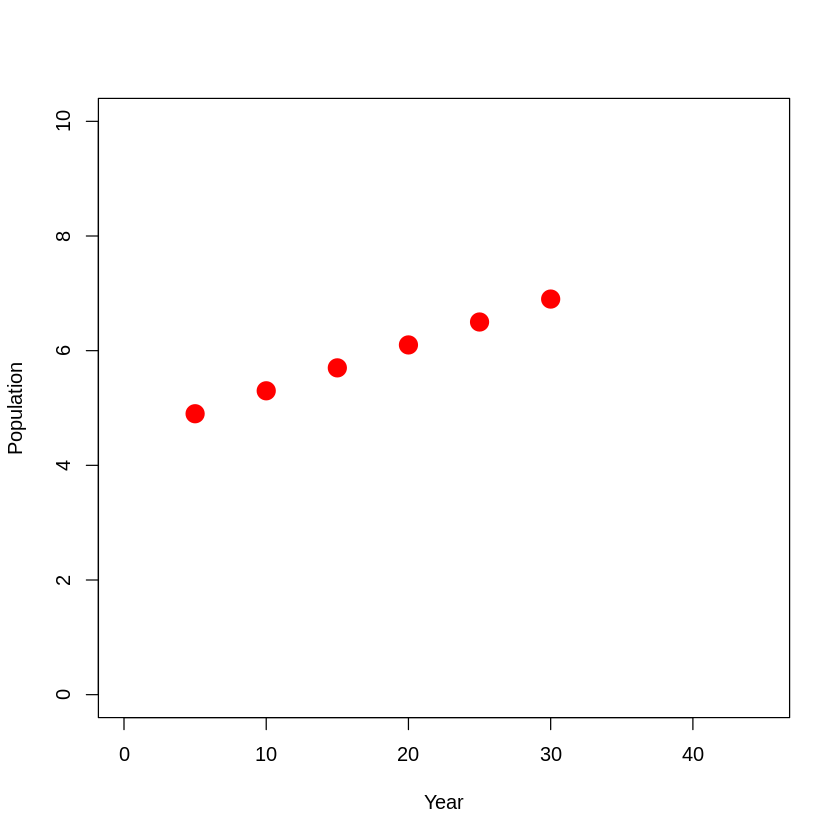

In [ ]:
Year1985 = c(5,4.9)
Year1990 = c(10,5.3)
Year1995 = c(15,5.7) 
Year2000 = c(20,6.1)
Year2005 = c(25,6.5)
Year2010 = c(30,6.9)

plot(seq(0,45,length.out=30),seq(0,10,length.out=30), type = "n",xlab = "Year", ylab = "Population") 
points(Year1985[1], Year1985[2], col = "red", pch = 19, cex = 2)
points(Year1990[1], Year1990[2], col = "red", pch = 19, cex = 2)
points(Year1995[1], Year1995[2], col = "red", pch = 19, cex = 2)
points(Year2000[1], Year2000[2], col = "red", pch = 19, cex = 2)
points(Year2005[1], Year2005[2], col = "red", pch = 19, cex = 2)
points(Year2010[1], Year2010[2], col = "red", pch = 19, cex = 2)

**Solution**
By substituting the data points $(5,4.9), (10,5.3), (15,5.7), (20,6.1), (25,6.5),$ and $(30,6.9)$ into the quadratic polynomial $y=c_0+c_1x+c_2x^2$, we obtain the system of linear equations:

\begin{align*}
c_0+5c_1+25c_2&=4.9\\
c_0+10c_1+100c_2&=5.3\\
c_0+15c_1+225c_2&=5.7\\
c_0+20c_1+400c_2&=6.1\\
c_0+25c_1+625c_2&=6.5\\
c_0+30c_1+900c_2&=6.9\\
\end{align*}

This produces the least squares problem
 $A\textbf{x}=\textbf{b}$
$$\begin{bmatrix}
1&5&25\\
1&10&100\\
1&15&225\\
1&20&400\\
1&25&625\\
1&30&900\\
\end{bmatrix}\begin{bmatrix}c_0\\c_1\\c_2\end{bmatrix}=\begin{bmatrix}4.9\\5.3\\5.7\\6.1\\6.5\\6.9\end{bmatrix}$$

The normal equations are represented by the system
$$A^TA\textbf{x}=A^T\textbf{b}$$


In [ ]:
A <- matrix(c(1,5,25,1,10,100,1,15,225,1,20,400,1,25,625,1,30,900), 6, 3, byrow = TRUE)
A
b <- matrix(c(4.9,5.3,5.7,6.1,6.5,6.9), 6, 1, byrow = TRUE)
b

1,5,25
1,10,100
1,15,225
1,20,400
1,25,625
1,30,900


4.9
5.3
5.7
6.1
6.5
6.9


In [ ]:
t(A)

1,1,1,1,1,1
5,10,15,20,25,30
25,100,225,400,625,900


In [ ]:
ATA <- t(A)%*%A
ATb <- t(A)%*%b

In [ ]:
inv(ATA)%*%ATb

4.500000e+00
8.000000e-02
1.110223e-16


Thus, 
\begin{align*}
A^TA=\begin{bmatrix}
6	&105&	2275\\
105	&2275	&55125\\
2275	&55125&	1421875
\end{bmatrix}\\
A^T\textbf{b}=\begin{bmatrix}35.4\\
654.5\\
14647.5
\end{bmatrix}
\end{align*}
and their solution is $\textbf{x}=\begin{bmatrix}c_0\\c_1\\c_2
\end{bmatrix}=\begin{bmatrix}4.5\\
0.08\\
0
\end{bmatrix}$.

Note that $c_2=0$. So, the least squares polynomial is the linear polynomial $y=4.5+0.08x$. Evaluating this polynomial at $x=40$ gives the estimate of the world population for the year 2020: $y=4.5+0.08*40=7.7$ billion.

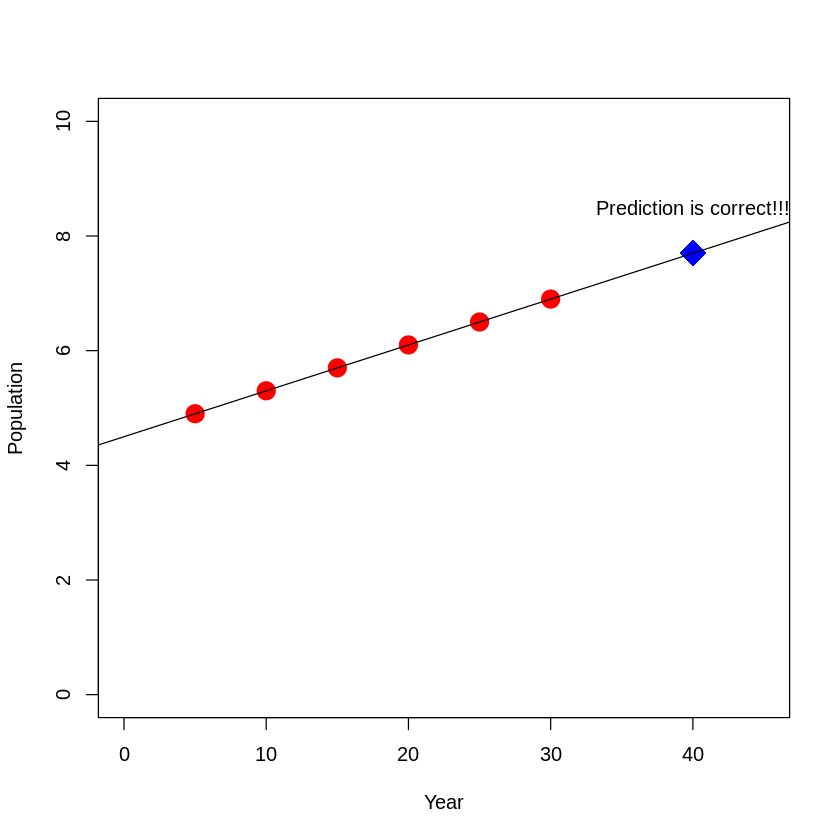

In [ ]:
Year1985 = c(5,4.9)
Year1990 = c(10,5.3)
Year1995 = c(15,5.7) 
Year2000 = c(20,6.1)
Year2005 = c(25,6.5)
Year2010 = c(30,6.9)
Year2020 = c(40,7.7)

plot(seq(0,45,length.out=30),seq(0,10,length.out=30), type = "n",xlab = "Year", ylab = "Population") 
points(Year1985[1], Year1985[2], col = "red", pch = 19, cex = 2)
points(Year1990[1], Year1990[2], col = "red", pch = 19, cex = 2)
points(Year1995[1], Year1995[2], col = "red", pch = 19, cex = 2)
points(Year2000[1], Year2000[2], col = "red", pch = 19, cex = 2)
points(Year2005[1], Year2005[2], col = "red", pch = 19, cex = 2)
points(Year2010[1], Year2010[2], col = "red", pch = 19, cex = 2)
points(Year2020[1], Year2020[2], col = "blue", pch = 18, cex = 3)
abline(4.5,0.08)
text(40,8.5,"Prediction is correct!!")

#Other models
Linear regression attempts to model the relationship between two variables by fitting a linear equation (= a straight line) to the observed data. What linear regression does is simply tell us the value of the dependent variable for an arbitrary independent/explanatory variable. Simple predictions are all cases of linear regression. We first observe the trend and then predict based on the trend. However, not all of situations follow a linear trend. For example, census data for the U.S. for the period 1790 to 2010 shown below, does not look like following the linear trend. 

[1] 1790 1800 1810 1820 1830 1840 1850 1860

[1]  3929214  5308483  7239881  9638453 12866020 17069453 23191876 31443321

Year,Census
<dbl>,<dbl>
1790,3929214
1800,5308483
1810,7239881
1820,9638453
1830,12866020
1840,17069453
1850,23191876
1860,31443321


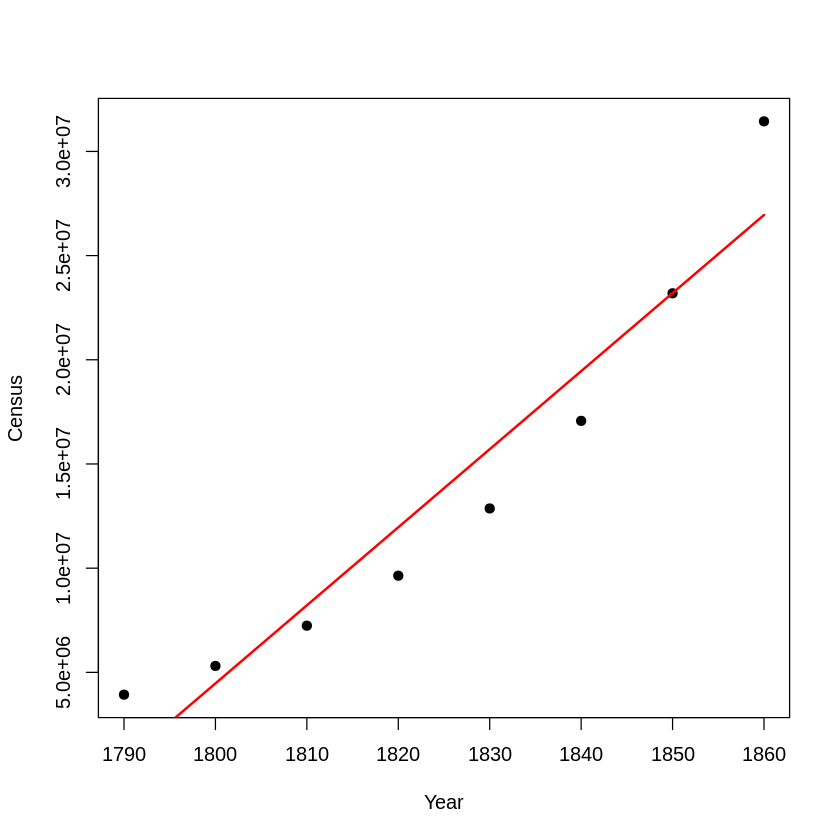

In [69]:
(Year <- seq(1790,1860, by =10))
(Census <-  as.numeric(c(3929214,5308483,7239881,9638453,12866020,17069453,23191876,31443321)))
(Data <- data.frame(Year, Census))
#plot(Year, Census)

# Linear model
exponential_model <- lm(Census~ Year)
c_0 = exponential_model$coefficients[1]
c_1 = exponential_model$coefficients[2]
Prediction <- c_0+c_1*(Year)
plot(Year, Census, pch = 19)
lines(Year, Prediction, lwd=2, type = "l", col = "red", xlab = "Time (s)", ylab = "Counts")

Linear regression is used everywhere, there is a simple function to get the regression line, namely, "lm()" that is used above.

Since the population looks like growing exponentially, let's fit exponential growth model.

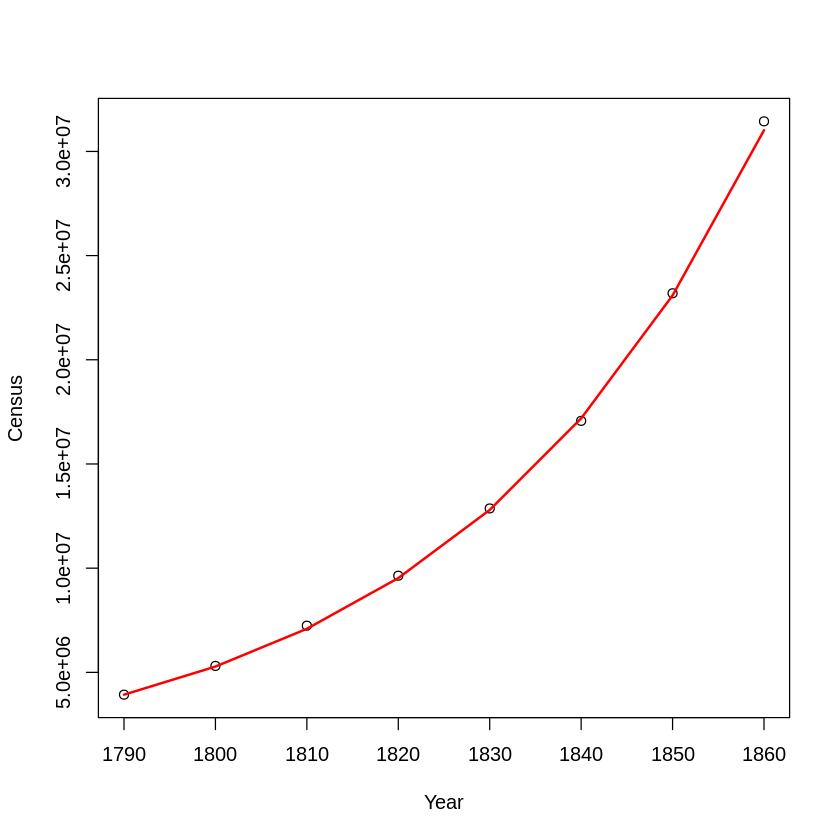

In [71]:
# (i) Exponential growth model 
exponential_model <- lm(log(Census)~ Year)
P_0 = Census[1]
r = exponential_model$coefficients[2]
fitted1 <- P_0*exp(r*(Year-1790))
plot(Year, Census)
lines(Year, fitted1,lwd=2, col = "red", xlab = "Time (s)", ylab = "Counts")

In [79]:
P_0*exp(r*(2020-1790))
3,487,318,505

Year 
3487318505

In [73]:
exponential_model$coefficients[2]

Year 
0.029515

It looks like this red line explains the population growth for 1790-1860 well. The formula for this curve is 
$$\text{Predicted population}=3,929,214e^{0.0295x}$$
where $x$ is the number of decade since 1790.

Can we predict the population for 2020 ($x=23$) just like we did earlier? 

$$\text{Predicted population in 2020}=3,929,214e^{0.0295*23}=3,487,318,505$$

The US population was 329.5 million in 2020 according to Census. So, our prediction is way too high compared to the actual population. 

What do you think is the problem? What can we do to improve the model?
If you are interested in, please visit here:
https://github.com/madonnaojorin/Intro_to_MathBio/blob/main/Exponential_Logistic_Growth.ipynb
